In [1]:
%matplotlib inline
import sys,os
try:
    import matk
except:
    try:
        sys.path.append(os.path.join('..','src'))
        import matk
    except ImportError as err:
        print 'Unable to load MATK module: '+str(err)
import numpy
from scipy import arange, randn, exp
from multiprocessing import freeze_support
# Model function
def dbexpl(p):
    t=arange(0,100,20.)
    y =  (p['par1']*exp(-p['par2']*t) + p['par3']*exp(-p['par4']*t))
    return y

# Setup MATK model with parameters
p = matk.matk(model=dbexpl)
p.add_par('par1',min=0,max=1)
p.add_par('par2',min=0,max=0.2)
p.add_par('par3',min=0,max=1)
# Create discrete parameter with 21 bins and uniform probabilities
vals = numpy.linspace(0,0.2,21)
probs = [1./20.]*21
p.add_par('par4',discrete_vals = (vals,probs))

# Create full factorial parameter study with 3 values for each parameter
s = p.parstudy(nvals=[3,3,3,3])

# Print values to make sure you got what you wanted
print "\nParameter values:"
print s.samples.values


Parameter values:
[[ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0.1]
 [ 0.   0.   0.   0.2]
 [ 0.   0.   0.5  0. ]
 [ 0.   0.   0.5  0.1]
 [ 0.   0.   0.5  0.2]
 [ 0.   0.   1.   0. ]
 [ 0.   0.   1.   0.1]
 [ 0.   0.   1.   0.2]
 [ 0.   0.1  0.   0. ]
 [ 0.   0.1  0.   0.1]
 [ 0.   0.1  0.   0.2]
 [ 0.   0.1  0.5  0. ]
 [ 0.   0.1  0.5  0.1]
 [ 0.   0.1  0.5  0.2]
 [ 0.   0.1  1.   0. ]
 [ 0.   0.1  1.   0.1]
 [ 0.   0.1  1.   0.2]
 [ 0.   0.2  0.   0. ]
 [ 0.   0.2  0.   0.1]
 [ 0.   0.2  0.   0.2]
 [ 0.   0.2  0.5  0. ]
 [ 0.   0.2  0.5  0.1]
 [ 0.   0.2  0.5  0.2]
 [ 0.   0.2  1.   0. ]
 [ 0.   0.2  1.   0.1]
 [ 0.   0.2  1.   0.2]
 [ 0.5  0.   0.   0. ]
 [ 0.5  0.   0.   0.1]
 [ 0.5  0.   0.   0.2]
 [ 0.5  0.   0.5  0. ]
 [ 0.5  0.   0.5  0.1]
 [ 0.5  0.   0.5  0.2]
 [ 0.5  0.   1.   0. ]
 [ 0.5  0.   1.   0.1]
 [ 0.5  0.   1.   0.2]
 [ 0.5  0.1  0.   0. ]
 [ 0.5  0.1  0.   0.1]
 [ 0.5  0.1  0.   0.2]
 [ 0.5  0.1  0.5  0. ]
 [ 0.5  0.1  0.5  0.1]
 [ 0.5  0.1  0.5  0.2]
 [ 0.5  0.1  1.

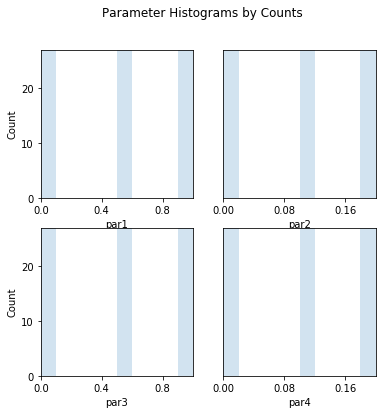



par1:
Count:           27        0        0        0        0       27        0        0        0       27 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par2:
Count:           27        0        0        0        0       27        0        0        0       27 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 

par3:
Count:           27        0        0        0        0       27        0        0        0       27 
 Bins:        0      0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8      0.9        1 

par4:
Count:           27        0        0        0        0       27        0        0        0       27 
 Bins:        0     0.02     0.04     0.06     0.08      0.1     0.12     0.14     0.16     0.18      0.2 



In [2]:
# Look at sample parameter histograms
out = s.samples.hist(ncols=2,title='Parameter Histograms by Counts')

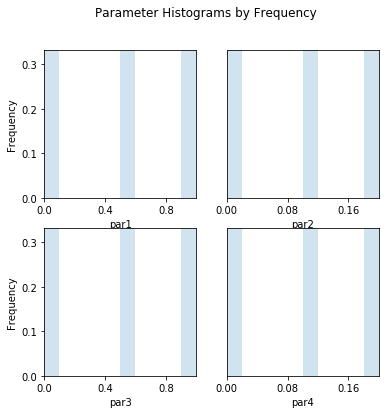

In [3]:
# This time use frequency instead of count and turn off printing histogram to screen
out = s.samples.hist(ncols=2,title='Parameter Histograms by Frequency',frequency=True,printout=False)

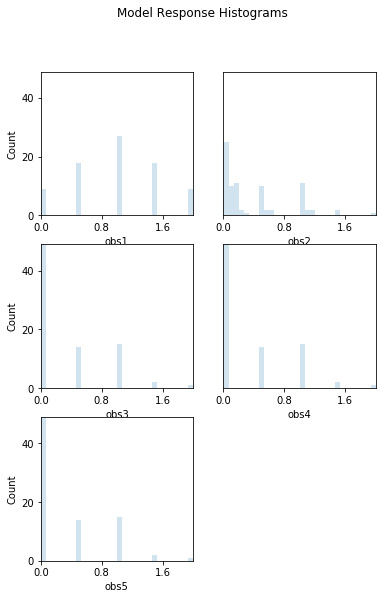

In [4]:
# Run model with parameter samples
s.run( cpus=2, outfile='results.dat', logfile='log.dat',verbose=False)

# Look at response histograms, correlations, and panels
# Note that printout has been set to False in this case to avoid printing histogram output to screen
out = s.responses.hist(ncols=2, bins=30, title='Model Response Histograms',printout=False)

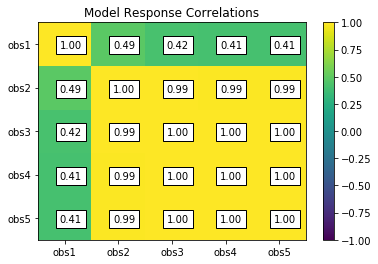

In [5]:
rescor = s.responses.corr(plot=True, title='Model Response Correlations',printout=False)

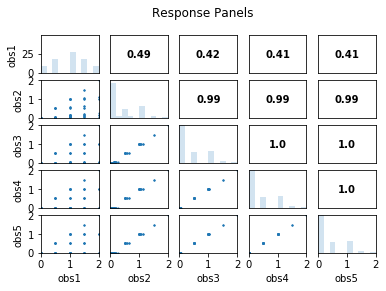

In [6]:
s.responses.panels(title='Response Panels')


Pearson Correlation Coefficients:
             obs1     obs2     obs3     obs4     obs5 
par1         0.71     0.34     0.30     0.29     0.29 
par2        -0.00    -0.44    -0.43    -0.43    -0.43 
par3         0.71     0.34     0.30     0.29     0.29 
par4         0.00    -0.44    -0.43    -0.43    -0.43 


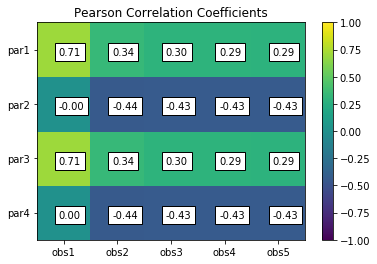

In [7]:
# Print and plot parameter/response correlations
print "\nPearson Correlation Coefficients:"
pcorr = s.corr(plot=True,title='Pearson Correlation Coefficients') 

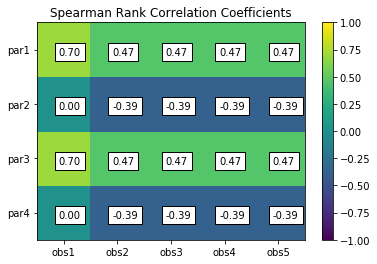

In [8]:
scorr = s.corr(plot=True,type='spearman',title='Spearman Rank Correlation Coefficients',printout=False) 

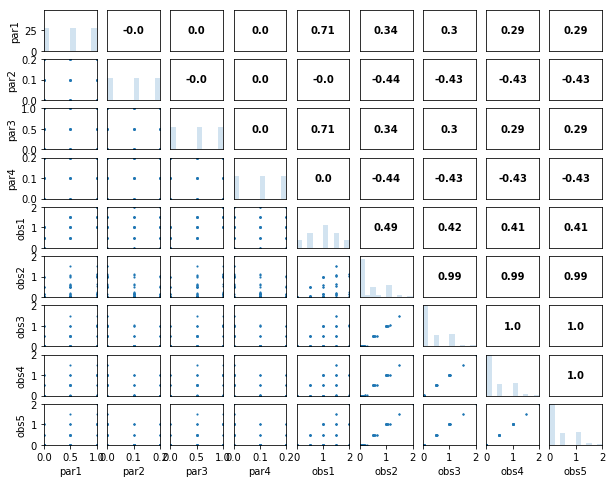

In [9]:
s.panels(figsize=(10,8))